In [ ]:
# UPLOAD DATASET FROM GOOGLE DRIVE

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/SAP_dataset.xlsx"
xls = pd.ExcelFile(file_path)

xls.sheet_names


Mounted at /content/drive


['AFE']

In [ ]:
df = pd.read_excel(xls, sheet_name='AFE')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23141 entries, 0 to 23140
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       23141 non-null  object 
 1   Country Code       23141 non-null  object 
 2   Indicator Name     23141 non-null  object 
 3   Topic              23141 non-null  object 
 4   short description  1594 non-null   object 
 5   long description   22875 non-null  object 
 6   Indicator Code     23141 non-null  object 
 7   Unit of measure    23141 non-null  object 
 8   2000               11376 non-null  float64
 9   2001               9576 non-null   float64
 10  2002               10009 non-null  float64
 11  2003               10012 non-null  float64
 12  2004               10229 non-null  float64
 13  2005               10798 non-null  float64
 14  2006               10662 non-null  float64
 15  2007               10542 non-null  float64
 16  2008               106

,Country Name,Country Code,Indicator Name,Topic,short description,long description,Indicator Code,Unit of measure,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,Africa Eastern and Southern,AFE,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.271724,NaN,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,Africa Western and Central,AFW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.197514,NaN,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN


In [ ]:
# Manually drop columns that are irrelavant/ too empty

df.drop(columns=['short description', 'long description', 'Indicator Code', 'Unit of measure', '2023'], inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23141 entries, 0 to 23140
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    23141 non-null  object 
 1   Country Code    23141 non-null  object 
 2   Indicator Name  23141 non-null  object 
 3   Topic           23141 non-null  object 
 4   2000            11376 non-null  float64
 5   2001            9576 non-null   float64
 6   2002            10009 non-null  float64
 7   2003            10012 non-null  float64
 8   2004            10229 non-null  float64
 9   2005            10798 non-null  float64
 10  2006            10662 non-null  float64
 11  2007            10542 non-null  float64
 12  2008            10641 non-null  float64
 13  2009            10815 non-null  float64
 14  2010            12255 non-null  float64
 15  2011            11313 non-null  float64
 16  2012            11455 non-null  float64
 17  2013            11078 non-null 

In [ ]:
# Convert long format to wide format using pivot

df_wide = df.pivot(index=['Country Name', 'Country Code'], columns='Indicator Name', values=[str(year) for year in range(2000, 2023)])
df_wide.columns = ['_'.join(col).strip() for col in df_wide.columns.values]
df_wide.reset_index(inplace=True)
df_wide.head()

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),"2000_Access to clean fuels and technologies for cooking, rural (% of rural population)","2000_Access to clean fuels and technologies for cooking, urban (% of urban population)",2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adequacy of social insurance programs (% of total welfare of beneficiary households),2000_Adequacy of social protection and labor programs (% of total welfare of beneficiary households),...,2022_Unemployment with basic education (% of total labor force with basic education),2022_Unemployment with intermediate education (% of total labor force with intermediate education),"2022_Unemployment, total (% of total labor force) (national estimate)",2022_Urban population (% of total population),"2022_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2022_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",2022_Wanted fertility rate (births per woman),2022_Women who were first married by age 15 (% of women ages 20-24),2022_Women who were first married by age 18 (% of women ages 20-24)
0,Afghanistan,AFG,5.500000,0.800000,25.300000,4.400000,NaN,73.400000,NaN,NaN,...,NaN,NaN,NaN,26.616000,8.878202,18.841205,18.259346,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,11.525904,3.469977,32.431714,19.963882,8.619522,53.665956,NaN,NaN,...,NaN,NaN,NaN,37.825158,20.164671,29.393837,25.069640,NaN,NaN,NaN
2,Africa Western and Central,AFW,4.999422,0.981631,11.944070,34.143210,16.676921,71.409502,NaN,NaN,...,2.429684,5.261144,3.031437,49.047385,13.838867,20.440624,17.564789,NaN,NaN,NaN
3,Albania,ALB,35.200000,15.900000,61.700000,99.400000,100.000000,96.100000,NaN,NaN,...,NaN,NaN,NaN,63.799000,49.573476,45.277198,47.177277,NaN,NaN,NaN
4,Algeria,DZA,96.400000,92.500000,99.600000,98.600000,97.400000,99.500000,NaN,NaN,...,NaN,NaN,NaN,74.772000,74.032838,67.930374,68.978348,NaN,NaN,NaN


In [ ]:
# Extract unique Indicator-Topic pairs from the original dataset

topic_mapping = df[['Indicator Name', 'Topic']]
topic_dict = dict(zip(topic_mapping['Indicator Name'], topic_mapping['Topic']))
print(topic_dict)


{'Control of Corruption: Estimate': 'Public Sector: Policy & institutions', 'Multilateral debt service (% of public and publicly guaranteed debt service)': 'Economic Policy & Debt: External debt: Debt ratios & other items', 'Access to clean fuels and technologies for cooking, rural (% of rural population)': 'Environment: Energy production & use', 'Access to clean fuels and technologies for cooking, urban (% of urban population)': 'Environment: Energy production & use', 'Access to clean fuels and technologies for cooking (% of population)': 'Environment: Energy production & use', 'Access to electricity, rural (% of rural population)': 'Environment: Energy production & use', 'Access to electricity, urban (% of urban population)': 'Environment: Energy production & use', 'Access to electricity (% of population)': 'Environment: Energy production & use', 'Compensation of employees (current LCU)': 'Public Sector: Government finance: Expense', 'Compensation of employees (% of expense)': 'Publi

In [ ]:
# CHECK IF AFTER CONVERTING TO WIDE FORMAT ALL COUNTRIES ARE UNIQUE

first_column_name = df_wide.columns[0]
is_unique = df_wide[first_column_name].is_unique

if is_unique:
    print("All entries in the first column are unique.")
else:
    print("There are duplicate entries in the first column.")

All entries in the first column are unique.


In [ ]:
# Drop columns with more than 50% missing values

missing_threshold = 0.5
df_wide = df_wide.dropna(axis=1, thresh=len(df_wide) * (1 - missing_threshold))
print("New dataset shape:", df_wide.shape)
df_wide.info()

New dataset shape: (266, 864)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 864 entries, Country Name to 2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
dtypes: float64(862), object(2)
memory usage: 1.8+ MB


In [ ]:
# Drop rows (countries) where more than 80% of values are missing

country_missing_threshold = 0.8
df_wide = df_wide.dropna(axis=0, thresh=len(df_wide.columns) * (1 - country_missing_threshold))
print("New dataset shape:", df_wide.shape)
df_wide.info()

New dataset shape: (265, 864)
<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 265
Columns: 864 entries, Country Name to 2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
dtypes: float64(862), object(2)
memory usage: 1.7+ MB


In [ ]:
missing_values = df_wide.isnull().sum().sum()
print(missing_values)

37252


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop non-numeric columns (Country Name, Country Code)
numeric_df = df_wide.drop(columns=['Country Name', 'Country Code'], errors='ignore')
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 265
Columns: 862 entries, 2000_Access to clean fuels and technologies for cooking (% of population) to 2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
dtypes: float64(862)
memory usage: 1.7 MB


In [ ]:
# EXTRACT ALL UNIQUE INDICATORS

import pandas as pd
indicator_columns = df_wide.columns[2:]
indicators = set(indicator_columns.str.extract(r'_(.*)$', expand=False))
indicators_df = pd.DataFrame(sorted(indicators), columns=["Indicator Name"])
print(indicators_df)

                                       Indicator Name
0   Access to clean fuels and technologies for coo...
1   Access to clean fuels and technologies for coo...
2   Access to clean fuels and technologies for coo...
3             Access to electricity (% of population)
4   Access to electricity, rural (% of rural popul...
5   Access to electricity, urban (% of urban popul...
6   Adjusted net national income per capita (curre...
7   Adjusted savings: education expenditure (curre...
8   Adolescent fertility rate (births per 1,000 wo...
9   Adolescents out of school (% of lower secondar...
10  Age dependency ratio (% of working-age populat...
11  Age dependency ratio, old (% of working-age po...
12  Age dependency ratio, young (% of working-age ...
13               Birth rate, crude (per 1,000 people)
14  Births attended by skilled health staff (% of ...
15  Cause of death, by communicable diseases and m...
16             Cause of death, by injury (% of total)
17  Cause of death, by non-c

In [ ]:
# List of indicators to drop unrelated to poverty

indicators_to_drop = [
    "Cause of death, by injury (% of total)",
    "Cause of death, by non-communicable diseases (% of total)",
    "Control of Corruption: Estimate",
    "International migrant stock, total",
    "Multilateral debt service (% of public and publicly guaranteed debt service)",
    "Terms of trade adjustment (constant LCU)",
    "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
]

columns_to_drop = [col for col in df_wide.columns if any(ind in col for ind in indicators_to_drop)]

df_wide.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped {len(columns_to_drop)} columns.")
print("New dataset shape:", df_wide.shape)
df_wide.head()


Dropped 92 columns.
New dataset shape: (265, 772)


,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),"2000_Access to clean fuels and technologies for cooking, rural (% of rural population)","2000_Access to clean fuels and technologies for cooking, urban (% of urban population)",2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted net national income per capita (current US$),2000_Adjusted savings: education expenditure (current US$),...,"2022_Employers, total (% of total employment) (modeled ILO estimate)",2022_People using at least basic drinking water services (% of population),2022_People using at least basic sanitation services (% of population),2022_People using safely managed drinking water services (% of population),2022_Political Stability and Absence of Violence/Terrorism: Estimate,"2022_Unemployment, total (% of total labor force) (national estimate)",2022_Urban population (% of total population),"2022_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2022_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,AFG,5.500000,0.800000,25.300000,4.400000,NaN,73.400000,NaN,NaN,...,1.620212,82.175371,55.951941,30.034098,-2.550802,NaN,26.616000,8.878202,18.841205,18.259346
1,Africa Eastern and Southern,AFE,11.525904,3.469977,32.431714,19.963882,8.619522,53.665956,578.032604,NaN,...,2.409992,59.103463,31.746333,NaN,NaN,NaN,37.825158,20.164671,29.393837,25.069640
2,Africa Western and Central,AFW,4.999422,0.981631,11.944070,34.143210,16.676921,71.409502,365.475332,NaN,...,2.112771,74.045640,38.647432,29.456889,NaN,3.031437,49.047385,13.838867,20.440624,17.564789
3,Albania,ALB,35.200000,15.900000,61.700000,99.400000,100.000000,96.100000,1038.956686,1.035291e+08,...,3.010689,95.094564,99.299266,70.736068,0.114945,NaN,63.799000,49.573476,45.277198,47.177277
4,Algeria,DZA,96.400000,92.500000,99.600000,98.600000,97.400000,99.500000,1298.795024,2.326532e+09,...,3.936470,94.661398,85.826289,70.597934,-0.741772,NaN,74.772000,74.032838,67.930374,68.978348


In [ ]:
missing_values = df_wide.isnull().sum().sum()
print(missing_values)

30623


In [ ]:
# SEE MISSING DATA PERCENTAGE FOR EVERY INDICATOR

import pandas as pd

df_grouped = df_wide.copy()
df_grouped.columns = df_grouped.columns.str.split('_', n=1).str[1]  # Keeps only indicator names

# Compute missing percentage per indicator (averaging across years)
missing_percentage = df_grouped.isnull().mean() * 100

# Group by indicator names (since multiple years exist for each)
missing_percentage = missing_percentage.groupby(missing_percentage.index).mean()

missing_df = pd.DataFrame({'Indicator': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_df = missing_df.sort_values(by="Missing Percentage", ascending=False)

print("Missing Data Percentage for Each Indicator:")
print(missing_df)


Missing Data Percentage for Each Indicator:
                                            Indicator  Missing Percentage
9   Adolescents out of school (% of lower secondar...           49.056604
26  Expenditure on secondary education (% of gover...           49.056604
19            Compensation of employees (current LCU)           47.169811
35  Unemployment with advanced education (% of tot...           47.169811
16   Children out of school (% of primary school age)           46.817610
36  Unemployment with basic education (% of total ...           46.792453
17                    Children out of school, primary           46.540881
37  Unemployment with intermediate education (% of...           46.037736
27  Expenditure on tertiary education (% of govern...           45.157233
38  Unemployment, total (% of total labor force) (...           43.478261
30  People using safely managed drinking water ser...           39.081214
18           Compensation of employees (% of expense)           35.2

In [ ]:
# SEE CORRELATION BETWEEN INDICATORS

import pandas as pd

df_corr = df_wide.copy()
df_corr = df_corr.drop(columns=['Country Name', 'Country Code'])

# Extract indicator names (ignoring years)
df_corr.columns = df_corr.columns.str.split('_', n=1).str[1]

# Aggregate by indicator (average across years)
df_corr = df_corr.groupby(df_corr.columns, axis=1).mean()

# Compute correlation matrix
correlation_matrix = df_corr.corr(method='pearson')

# Extract pairs with high correlation (threshold |r| > 0.8)
high_corr_pairs = (
    correlation_matrix.where((correlation_matrix > 0.8) | (correlation_matrix < -0.8))
    .stack()
    .reset_index()
)

# Remove duplicate pairs and self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] < high_corr_pairs['level_1']]

high_corr_pairs.columns = ["Indicator 1", "Indicator 2", "Correlation"]

# Sort by absolute correlation
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print("Highly Correlated Indicators (|r| > 0.8):")
print(high_corr_pairs)

output_path = "/content/highly_correlated_indicators.csv"
high_corr_pairs.to_csv(output_path, index=False)

from google.colab import files
files.download(output_path)

Highly Correlated Indicators (|r| > 0.8):
                                           Indicator 1  \
267  Wage and salaried workers, male (% of male emp...   
259  Wage and salaried workers, female (% of female...   
120  Age dependency ratio, young (% of working-age ...   
179  Employers, male (% of male employment) (modele...   
46             Access to electricity (% of population)   
..                                                 ...   
68   Access to electricity, rural (% of rural popul...   
163  Cause of death, by communicable diseases and m...   
52             Access to electricity (% of population)   
164  Cause of death, by communicable diseases and m...   
69   Access to electricity, rural (% of rural popul...   

                                           Indicator 2  Correlation  
267  Wage and salaried workers, total (% of total e...     0.993811  
259  Wage and salaried workers, total (% of total e...     0.989976  
120               Birth rate, crude (per 1,000 peop

<ipython-input-17-7af08d56eb55>:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_corr = df_corr.groupby(df_corr.columns, axis=1).mean()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# DROP HIGHLY CORRELATED INDICATORS

indicators_to_drop = [
    "Wage and salaried workers, male (% of male employment) (modeled ILO estimate)",
    "Wage and salaried workers, female (% of female employment) (modeled ILO estimate)",
    "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "Access to clean fuels and technologies for cooking, urban (% of urban population)"
]

cols_to_drop = [col for col in df_wide.columns if any(ind in col for ind in indicators_to_drop)]

df_wide.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns.")
print("Remaining columns:", df_wide.shape[1])
df_wide.head()


Dropped 92 columns.
Remaining columns: 680


,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adjusted net national income per capita (current US$),2000_Adjusted savings: education expenditure (current US$),"2000_Adolescent fertility rate (births per 1,000 women ages 15-19)",2000_Age dependency ratio (% of working-age population),...,"2022_Employers, female (% of female employment) (modeled ILO estimate)","2022_Employers, male (% of male employment) (modeled ILO estimate)","2022_Employers, total (% of total employment) (modeled ILO estimate)",2022_People using at least basic drinking water services (% of population),2022_People using at least basic sanitation services (% of population),2022_People using safely managed drinking water services (% of population),2022_Political Stability and Absence of Violence/Terrorism: Estimate,"2022_Unemployment, total (% of total labor force) (national estimate)",2022_Urban population (% of total population),"2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,AFG,5.500000,4.400000,NaN,73.400000,NaN,NaN,152.572000,108.346635,...,0.362038,1.698236,1.620212,82.175371,55.951941,30.034098,-2.550802,NaN,26.616000,18.259346
1,Africa Eastern and Southern,AFE,11.525904,19.963882,8.619522,53.665956,578.032604,NaN,123.134769,92.044732,...,1.701503,3.034597,2.409992,59.103463,31.746333,NaN,NaN,NaN,37.825158,25.069640
2,Africa Western and Central,AFW,4.999422,34.143210,16.676921,71.409502,365.475332,NaN,135.384758,90.051109,...,1.507403,2.580022,2.112771,74.045640,38.647432,29.456889,NaN,3.031437,49.047385,17.564789
3,Albania,ALB,35.200000,99.400000,100.000000,96.100000,1038.956686,1.035291e+08,14.792000,59.657295,...,1.149026,4.487047,3.010689,95.094564,99.299266,70.736068,0.114945,NaN,63.799000,47.177277
4,Algeria,DZA,96.400000,98.600000,97.400000,99.500000,1298.795024,2.326532e+09,9.302000,61.500880,...,1.839312,4.371295,3.936470,94.661398,85.826289,70.597934,-0.741772,NaN,74.772000,68.978348


In [ ]:
missing_values = df_wide.isnull().sum().sum()
print(missing_values)

27953


In [ ]:
# RESTRUCTURE DATA FROM INDICATOR_YEAR TO YEAR_INDICATOR

meta_cols = ['Country Name', 'Country Code']

indicator_year_pairs = [col for col in df_wide.columns if col not in meta_cols]

indicators = sorted(set("_".join(col.split("_")[1:]) for col in indicator_year_pairs))

new_column_order = meta_cols + [
    f"{year}_{indicator}" for indicator in indicators for year in range(2000, 2023)
]

new_column_order = [col for col in new_column_order if col in df_wide.columns]
df_wide = df_wide[new_column_order]

csv_path = "/content/restructured_data.csv"
excel_path = "/content/restructured_data.xlsx"

df_wide.to_csv(csv_path, index=False)
df_wide.to_excel(excel_path, index=False)

print(f"Files saved:\nCSV: {csv_path}\nExcel: {excel_path}")

Files saved:
CSV: /content/restructured_data.csv
Excel: /content/restructured_data.xlsx


In [ ]:
from google.colab import files
files.download(excel_path) # Download Excel

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_wide

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2001_Access to clean fuels and technologies for cooking (% of population),2002_Access to clean fuels and technologies for cooking (% of population),2003_Access to clean fuels and technologies for cooking (% of population),2004_Access to clean fuels and technologies for cooking (% of population),2005_Access to clean fuels and technologies for cooking (% of population),2006_Access to clean fuels and technologies for cooking (% of population),2007_Access to clean fuels and technologies for cooking (% of population),...,"2013_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2014_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2015_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2016_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2017_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2018_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2019_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2020_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2021_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,AFG,5.500000,6.600000,7.700000,9.000000,10.500000,11.900000,13.500000,15.100000,...,11.574016,12.037376,12.612444,13.217040,13.904849,14.638503,15.557754,15.666043,17.719207,18.259346
1,Africa Eastern and Southern,AFE,11.525904,11.850593,12.175592,12.551723,12.924851,13.347701,13.804893,14.226285,...,24.721238,25.049590,25.271594,25.258113,25.349516,25.355688,25.243920,24.609162,24.710108,25.069640
2,Africa Western and Central,AFW,4.999422,5.138647,5.291120,5.466981,5.658584,5.827095,6.041777,6.275848,...,18.538076,18.377014,18.281948,18.174335,17.701215,17.669886,17.571845,17.282398,17.374956,17.564789
3,Albania,ALB,35.200000,38.300000,41.400000,45.100000,47.800000,51.500000,54.700000,57.650000,...,40.481797,42.073820,41.187502,41.395776,42.887304,44.519120,45.731772,45.925396,46.576221,47.177277
4,Algeria,DZA,96.400000,97.000000,97.400000,97.800000,98.100000,98.400000,98.600000,98.800000,...,68.965515,69.055705,68.928602,69.078195,69.318897,69.465238,69.343873,68.668624,68.804558,68.978348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.054012,67.627201,68.639432,69.458690,69.622069,69.738367,71.434607,72.315671,72.219794,76.172663
262,World,WLD,49.296068,49.816012,50.434400,51.025985,51.729924,52.338751,53.164064,54.047592,...,50.848124,51.330123,51.782422,52.508682,52.449006,52.788179,52.901188,51.983406,52.073582,51.981562
263,"Yemen, Rep.",YEM,54.650000,55.500000,56.500000,56.800000,57.800000,57.900000,58.700000,59.100000,...,50.558656,50.491601,48.721844,47.497438,46.171132,45.241853,44.742153,44.825752,45.130079,45.522387
264,Zambia,ZMB,13.800000,14.300000,14.600000,15.000000,15.300000,15.800000,16.000000,16.100000,...,21.197809,22.051096,22.919564,23.956324,25.006956,25.831112,25.616827,24.676350,26.650589,26.980686


In [ ]:
# CALCULATE TOTAL MISSING VALUES FOR EVERY COUNTRY UNDER EVERY INDICATOR ACROSS ALL YEARS

import re
from google.colab import files

country_col = "Country Name"

df_cleaned = df_wide.copy()
df_cleaned.columns = [re.sub(r'^\d{4}_', '', col) for col in df_wide.columns]

df_cleaned = df_cleaned.drop(columns=["Country Code"], errors="ignore")

# Group by country and sum missing values across all years for each indicator
missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())

# Sum duplicate indicator columns (since years are now removed)
missing_table = missing_table.groupby(axis=1, level=0).sum()

output_filename = "final_missing_values_summary.csv"
missing_table.to_csv(output_filename)
files.download(output_filename)
print("File saved and ready for download:", output_filename)
missing_table

<ipython-input-23-ff489077d3b5>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())
<ipython-input-23-ff489077d3b5>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  missing_table = missing_table.groupby(axis=1, level=0).sum()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File saved and ready for download: final_missing_values_summary.csv


,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adolescents out of school (% of lower secondary school age),Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Political Stability and Absence of Violence/Terrorism: Estimate,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)",Unemployment with advanced education (% of total labor force with advanced education),Unemployment with basic education (% of total labor force with basic education),Unemployment with intermediate education (% of total labor force with intermediate education),"Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,3,0,9,9,0,1,0,0,...,0,1,4,15,1,1,1,17,0,0
Africa Eastern and Southern,0,0,2,0,0,22,0,1,0,0,...,22,0,0,0,1,1,1,23,0,0
Africa Western and Central,0,0,0,0,0,22,0,1,0,0,...,22,0,1,1,0,0,0,19,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
Algeria,0,0,0,0,0,0,0,1,0,0,...,0,0,9,5,1,1,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,23,0,0,0,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
World,0,0,0,0,0,22,0,1,0,0,...,22,0,0,0,1,1,1,9,0,0
"Yemen, Rep.",0,0,1,0,3,3,0,1,0,0,...,0,10,11,13,1,1,1,15,0,0


In [ ]:
# CHECKING HOW MANY YEARS ARE PRESENT UNDER EACH INDICATOR

import pandas as pd
import re
from google.colab import files

df_check = df_wide.copy()

years = sorted(set(int(col.split("_")[0]) for col in df_check.columns if re.match(r"^\d{4}_", col)))
indicators = sorted(set("_".join(col.split("_")[1:]) for col in df_check.columns if "_" in col))

indicator_year_matrix = pd.DataFrame(0, index=indicators, columns=years)

# Fill in the matrix (1 if the indicator exists for that year)
for col in df_check.columns:
    if "_" in col:
        year, indicator = col.split("_", 1)
        if year.isdigit():
            indicator_year_matrix.at[indicator, int(year)] = 1

output_filename = "indicator_year_matrix.csv"
indicator_year_matrix.to_csv(output_filename)
files.download(output_filename)

indicator_year_matrix.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Access to clean fuels and technologies for cooking (% of population),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Access to electricity (% of population),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Access to electricity, rural (% of rural population)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Access to electricity, urban (% of urban population)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Adjusted net national income per capita (current US$),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# DROPPING INDICATORS WITH LESS THAN 10 YEARS PRESENT

import pandas as pd
import re
from google.colab import files

df_filtered = df_wide.copy()

indicators = sorted(set("_".join(col.split("_")[1:]) for col in df_filtered.columns if "_" in col))
indicator_year_counts = {ind: sum(1 for col in df_filtered.columns if ind in col) for ind in indicators}

# Define threshold (minimum 10 years of data to keep an indicator)
threshold_years = 10

# Identify indicators to drop
indicators_to_drop = [ind for ind, count in indicator_year_counts.items() if count < threshold_years]

# Generate a list of columns to remove (all years for those indicators)
columns_to_drop = [col for col in df_filtered.columns if any(ind in col for ind in indicators_to_drop)]
df_filtered.drop(columns=columns_to_drop, inplace=True)

output_filename = "filtered_dataset.csv"
df_filtered.to_csv(output_filename, index=False)
files.download(output_filename)
df_filtered.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2001_Access to clean fuels and technologies for cooking (% of population),2002_Access to clean fuels and technologies for cooking (% of population),2003_Access to clean fuels and technologies for cooking (% of population),2004_Access to clean fuels and technologies for cooking (% of population),2005_Access to clean fuels and technologies for cooking (% of population),2006_Access to clean fuels and technologies for cooking (% of population),2007_Access to clean fuels and technologies for cooking (% of population),...,"2013_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2014_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2015_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2016_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2017_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2018_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2019_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2020_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2021_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,AFG,5.500000,6.600000,7.700000,9.000000,10.500000,11.900000,13.500000,15.100000,...,11.574016,12.037376,12.612444,13.217040,13.904849,14.638503,15.557754,15.666043,17.719207,18.259346
1,Africa Eastern and Southern,AFE,11.525904,11.850593,12.175592,12.551723,12.924851,13.347701,13.804893,14.226285,...,24.721238,25.049590,25.271594,25.258113,25.349516,25.355688,25.243920,24.609162,24.710108,25.069640
2,Africa Western and Central,AFW,4.999422,5.138647,5.291120,5.466981,5.658584,5.827095,6.041777,6.275848,...,18.538076,18.377014,18.281948,18.174335,17.701215,17.669886,17.571845,17.282398,17.374956,17.564789
3,Albania,ALB,35.200000,38.300000,41.400000,45.100000,47.800000,51.500000,54.700000,57.650000,...,40.481797,42.073820,41.187502,41.395776,42.887304,44.519120,45.731772,45.925396,46.576221,47.177277
4,Algeria,DZA,96.400000,97.000000,97.400000,97.800000,98.100000,98.400000,98.600000,98.800000,...,68.965515,69.055705,68.928602,69.078195,69.318897,69.465238,69.343873,68.668624,68.804558,68.978348


In [ ]:
missing_values = df_filtered.isnull().sum().sum()
print(missing_values)

25524


In [ ]:
# CHECKING HOW MANY YEARS ARE PRESENT FOR EACH INDICATOR

import pandas as pd
import re
from google.colab import files

df_check = df_filtered.copy()

years = sorted(set(int(col.split("_")[0]) for col in df_check.columns if re.match(r"^\d{4}_", col)))
indicators = sorted(set("_".join(col.split("_")[1:]) for col in df_check.columns if "_" in col))

indicator_year_matrix = pd.DataFrame(0, index=indicators, columns=years)

# Fill in the matrix (1 if the indicator exists for that year)
for col in df_check.columns:
    if "_" in col:
        year, indicator = col.split("_", 1)
        if year.isdigit():
            indicator_year_matrix.at[indicator, int(year)] = 1

output_filename = "indicator_year_matrix.csv"
indicator_year_matrix.to_csv(output_filename)
files.download(output_filename)

indicator_year_matrix.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Access to clean fuels and technologies for cooking (% of population),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Access to electricity (% of population),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Access to electricity, rural (% of rural population)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Access to electricity, urban (% of urban population)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Adjusted net national income per capita (current US$),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
# CALCULATE TOTAL MISSING VALUES FOR EVERY COUNTRY UNDER EVERY INDICATOR ACROSS ALL YEARS

import re
from google.colab import files

country_col = "Country Name"

df_cleaned = df_filtered.copy()
df_cleaned.columns = [re.sub(r'^\d{4}_', '', col) for col in df_filtered.columns]

df_cleaned = df_cleaned.drop(columns=["Country Code"], errors="ignore")

missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())

missing_table = missing_table.groupby(axis=1, level=0).sum()

output_filename = "final_missing_values_summary.csv"
missing_table.to_csv(output_filename)

# files.download(output_filename)

print("File saved and ready for download:", output_filename)
missing_table

File saved and ready for download: final_missing_values_summary.csv


<ipython-input-28-3a70a4f2e089>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())
<ipython-input-28-3a70a4f2e089>:15: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  missing_table = missing_table.groupby(axis=1, level=0).sum()


,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,3,0,9,9,0,0,0,0,...,0,0,0,0,1,4,15,17,0,0
Africa Eastern and Southern,0,0,2,0,0,22,0,0,0,0,...,0,0,23,22,0,0,0,23,0,0
Africa Western and Central,0,0,0,0,0,22,0,0,0,0,...,0,0,0,22,0,1,1,19,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,23,0,0,0,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
World,0,0,0,0,0,22,0,0,0,0,...,0,0,0,22,0,0,0,9,0,0
"Yemen, Rep.",0,0,1,0,3,3,0,0,0,0,...,0,0,23,0,10,11,13,15,0,0


In [ ]:
# Identify indicators where the max missing count per country is ≤ 9

missing_table.set_index("Country Name", inplace=True)

few_missing_threshold = 9

few_missing_indicators = missing_table.max(axis=0) <= few_missing_threshold

indicators_with_few_missing = few_missing_indicators[few_missing_indicators].index.tolist()

print("Indicators with 1-9 missing values per country:")
print(indicators_with_few_missing)

Indicators with 1-9 missing values per country:
['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)']


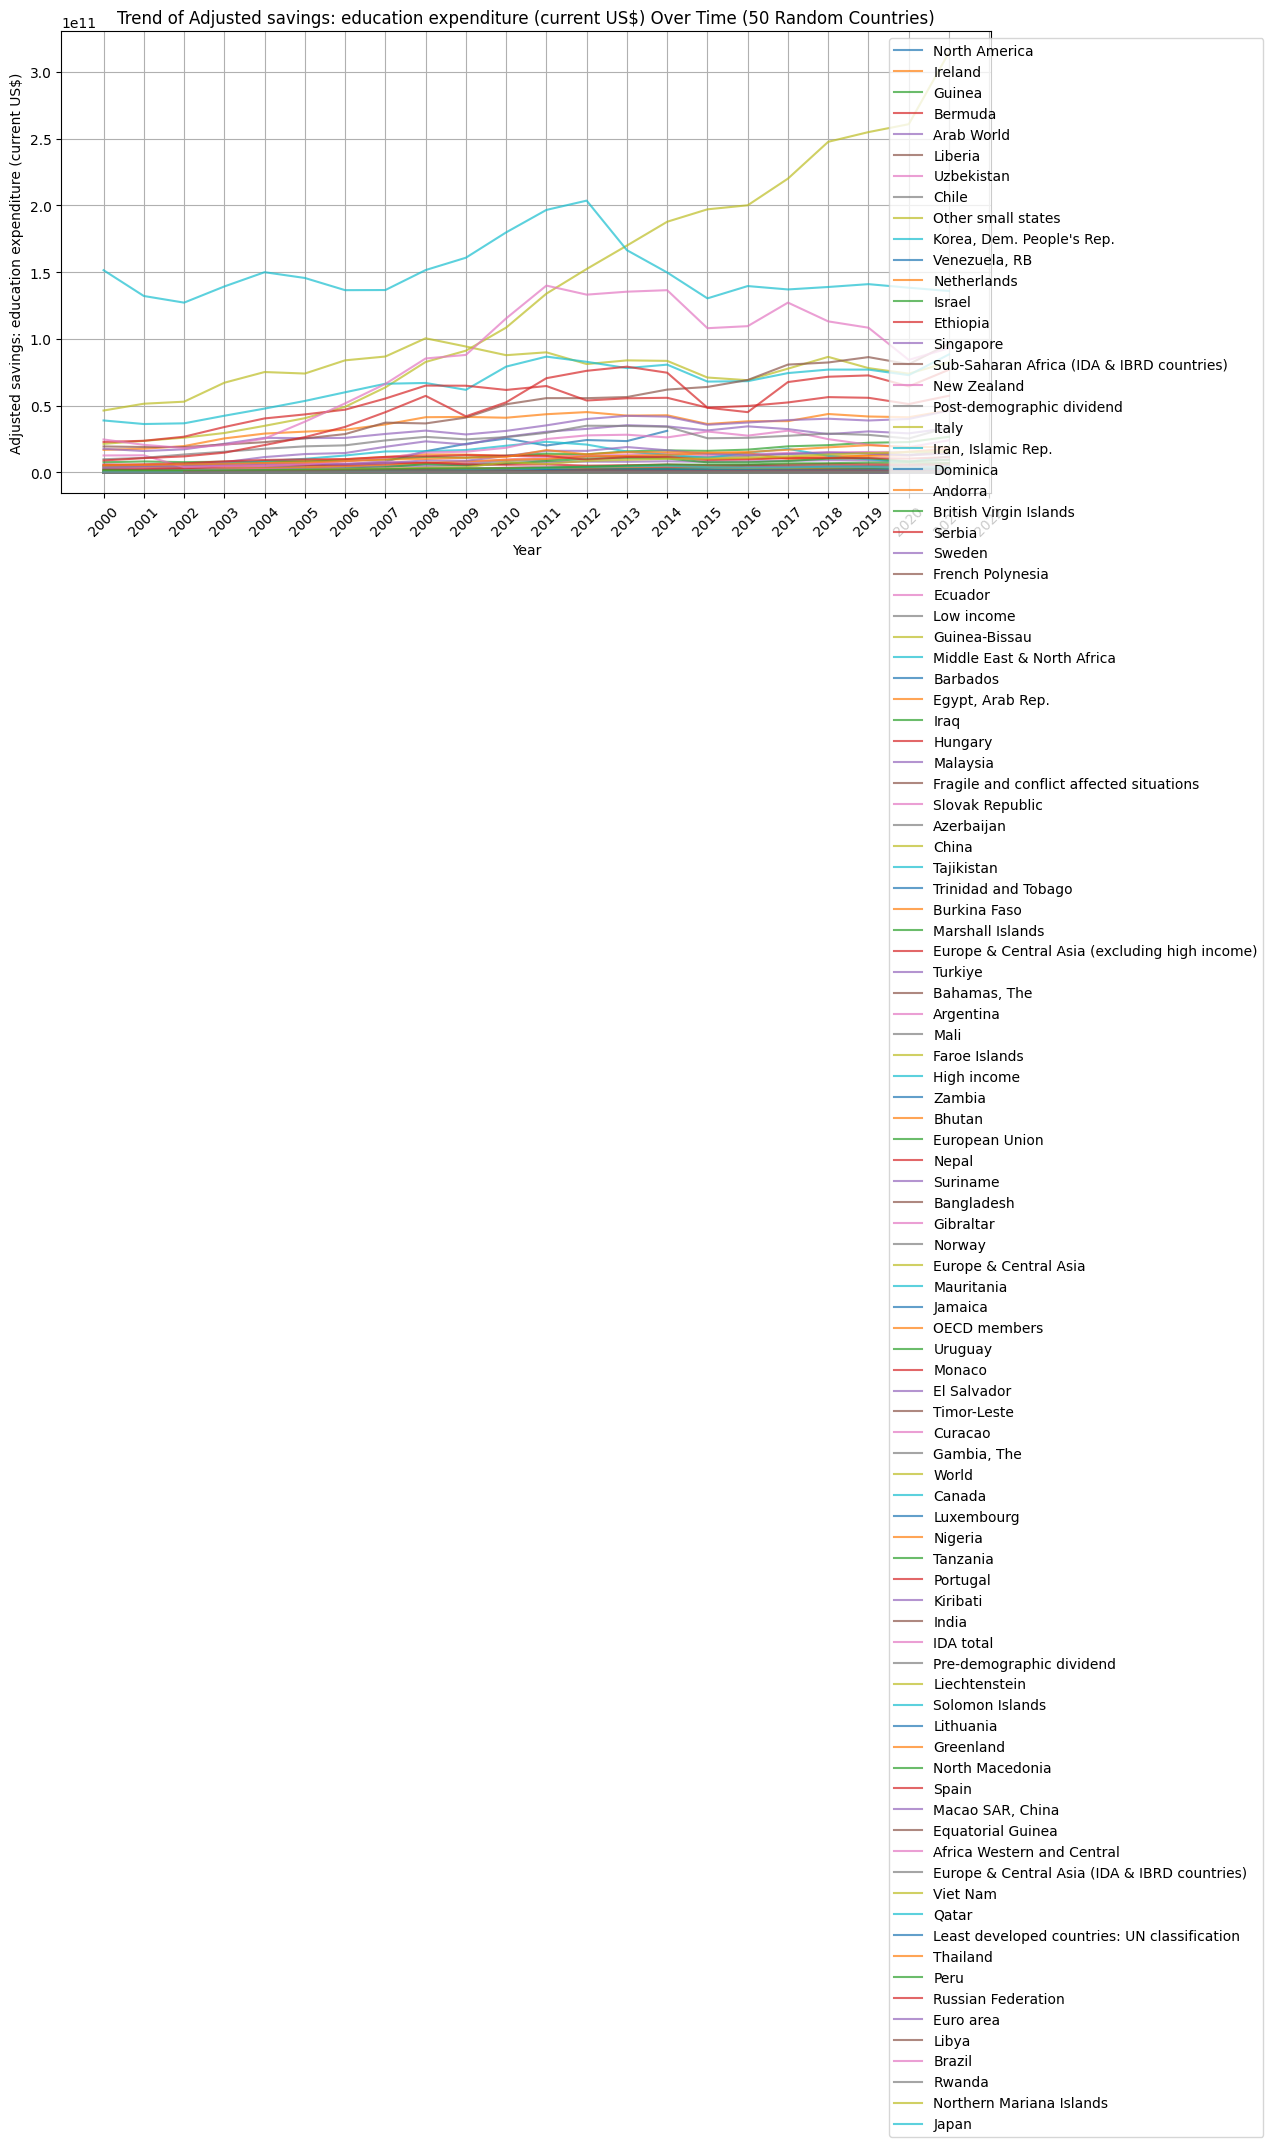

In [ ]:
# PLOTTING INDICATORS TO ANALYZE TRENDS TO DECIDE HOW TO IMPUTE

import matplotlib.pyplot as plt
import numpy as np
import re

# Select an indicator to plot
indicator_to_plot = "Adjusted savings: education expenditure (current US$)"

indicator_columns = [col for col in df_filtered.columns if indicator_to_plot in col]
indicator_columns = sorted(indicator_columns, key=lambda x: int(x.split("_")[0]))

# Extract data for plotting (transpose to get years on x-axis)
df_plot = df_filtered[["Country Name"] + indicator_columns].set_index("Country Name").T

df_plot.index = [int(col.split('_')[0]) for col in indicator_columns]

# Select 50 random countries to plot
np.random.seed(42)
sample_countries = np.random.choice(df_plot.columns, min(100, len(df_plot.columns)), replace=False)

# Plot
plt.figure(figsize=(12, 6))
for country in sample_countries:
    plt.plot(df_plot.index, df_plot[country], label=country, alpha=0.7)

plt.xlabel("Year")
plt.ylabel(indicator_to_plot)
plt.title(f"Trend of {indicator_to_plot} Over Time (50 Random Countries)")

plt.xticks(ticks=np.arange(2000, 2023, 1), labels=np.arange(2000, 2023, 1), rotation=45)

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 265
Columns: 657 entries, Country Name to 2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
dtypes: float64(655), object(2)
memory usage: 1.3+ MB


In [ ]:
# FINDING THE CORRELATION BETWEEN EVERY PAIR OF COUNTRIES

import pandas as pd
import numpy as np
from google.colab import files

df_corr = df_filtered.copy()

df_corr.set_index("Country Name", inplace=True)  # Set country names as index
df_corr.drop(columns=["Country Code"], errors="ignore", inplace=True)

# Compute country-to-country correlation across all indicators & years
correlation_matrix = df_corr.T.corr(method='pearson')

correlation_file = "country_correlations.csv"
correlation_matrix.to_csv(correlation_file)
files.download(correlation_file)
correlation_matrix.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uzbekistan,Vanuatu,"Venezuela, RB",Viet Nam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.941369,0.938328,0.981636,0.995306,0.199114,1.000000,0.969998,0.977988,0.901116,...,0.983502,0.975891,0.986843,0.946025,0.318152,0.969498,0.882920,0.990531,0.978302,0.935186
Africa Eastern and Southern,0.941369,1.000000,0.989310,0.977683,0.983532,0.130695,0.333675,0.938141,0.360964,0.988963,...,0.929065,0.989391,0.963038,0.909061,0.233422,0.639641,0.985468,0.967150,0.974512,0.886157
Africa Western and Central,0.938328,0.989310,1.000000,0.975617,0.981191,0.044964,0.107684,0.955152,0.151016,0.985734,...,0.952297,0.984155,0.973162,0.928710,0.236683,0.639463,0.972555,0.983615,0.982291,0.900375
Albania,0.981636,0.977683,0.975617,1.000000,0.986524,0.788731,1.000000,0.923722,0.950507,0.991671,...,0.945279,0.958346,0.937744,0.929891,0.912350,0.975462,0.988503,0.973452,0.930806,0.916242
Algeria,0.995306,0.983532,0.981191,0.986524,1.000000,0.886716,1.000000,0.965496,0.936332,0.995353,...,0.967290,0.980668,0.956010,0.897239,0.946637,0.954006,0.981041,0.986003,0.932215,0.891177


In [ ]:
# FIND HOW CORRELATED EACH COUNTRY IS TO THE COUNTRIES WITH NO MISSING DATA

import pandas as pd
from google.colab import files

correlation_matrix = correlation_matrix.copy()

# 🔹 List of 11 fully complete countries
complete_countries = [
    "Belgium", "Cyprus", "Finland",
    "France", "Hungary", "Israel",
    "Italy", "Norway", "Slovak Republic",
    "Slovenia", "Spain"
]

# 🔹 Extract only missing countries (countries NOT in complete_countries)
missing_countries = [c for c in correlation_matrix.index if c not in complete_countries]

# 🔹 Find the most correlated complete country for each missing country
most_correlated = {}

for country in missing_countries:
    country_corr = correlation_matrix.loc[country, complete_countries]

    best_match = country_corr.idxmax()
    best_corr = country_corr.max()

    most_correlated[country] = (best_match, best_corr)

# Convert to DataFrame
correlated_countries_df = pd.DataFrame.from_dict(
    most_correlated, orient="index", columns=["Most Correlated Country", "Correlation"]
)

correlated_countries_df.to_csv("most_correlated_countries.csv")
files.download("most_correlated_countries.csv")
correlated_countries_df.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Most Correlated Country,Correlation
Afghanistan,Finland,0.991819
Africa Eastern and Southern,Norway,0.981848
Africa Western and Central,Slovak Republic,0.980191
Albania,Slovak Republic,0.996882
Algeria,Norway,0.994728


In [ ]:
# IMPUTE COUNTRIES THAT HAVE A CORRELATION OF GREATER THAN 0.98 WITH THE COMPLETE COUNTRIES

import pandas as pd
import numpy as np
from google.colab import files

correlation_matrix = correlation_matrix.copy()

complete_countries = [
    "Belgium", "Cyprus", "Finland",
    "France", "Hungary", "Israel",
    "Italy", "Norway", "Slovak Republic",
    "Slovenia", "Spain"
]

missing_countries = [c for c in correlation_matrix.index if c not in complete_countries]

# Filter for missing countries with correlation > 0.98
valid_missing_countries = {}
for country in missing_countries:
    country_corr = correlation_matrix.loc[country, complete_countries]

    # Keep only countries with correlation > 0.98
    high_corr = country_corr[country_corr > 0.98].sort_values(ascending=False)

    if len(high_corr) >= 1:
        valid_missing_countries[country] = high_corr.index[:3]  # Take top 3

df_filled = df_filtered.copy()

# Apply Weighted Average Imputation
for missing_country, correlated_countries in valid_missing_countries.items():
    weights = correlation_matrix.loc[missing_country, correlated_countries].values
    correlated_data = df_filled.set_index("Country Name").loc[correlated_countries]
    correlated_data = correlated_data.drop(columns=["Country Code"], errors="ignore")
    correlated_data = correlated_data.apply(pd.to_numeric, errors="coerce")

    # Compute weighted average
    weighted_avg = pd.Series(np.average(correlated_data, axis=0, weights=weights), index=correlated_data.columns)
    mask = df_filled.set_index("Country Name").loc[missing_country].isnull()
    common_columns = mask.index.intersection(weighted_avg.index)

    # Only assign values where NaN exists (don't overwrite existing values)
    for col in common_columns:
        if mask[col]:  # Only fill missing values
            df_filled.loc[df_filled["Country Name"] == missing_country, col] = weighted_avg[col]

filled_file = "weighted_average_filled_data.csv"
df_filled.to_csv(filled_file, index=False)
files.download(filled_file)
df_filled.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Country Name,Country Code,2000_Access to clean fuels and technologies for cooking (% of population),2001_Access to clean fuels and technologies for cooking (% of population),2002_Access to clean fuels and technologies for cooking (% of population),2003_Access to clean fuels and technologies for cooking (% of population),2004_Access to clean fuels and technologies for cooking (% of population),2005_Access to clean fuels and technologies for cooking (% of population),2006_Access to clean fuels and technologies for cooking (% of population),2007_Access to clean fuels and technologies for cooking (% of population),...,"2013_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2014_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2015_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2016_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2017_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2018_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2019_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2020_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2021_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,AFG,5.500000,6.600000,7.700000,9.000000,10.500000,11.900000,13.500000,15.100000,...,11.574016,12.037376,12.612444,13.217040,13.904849,14.638503,15.557754,15.666043,17.719207,18.259346
1,Africa Eastern and Southern,AFE,11.525904,11.850593,12.175592,12.551723,12.924851,13.347701,13.804893,14.226285,...,24.721238,25.049590,25.271594,25.258113,25.349516,25.355688,25.243920,24.609162,24.710108,25.069640
2,Africa Western and Central,AFW,4.999422,5.138647,5.291120,5.466981,5.658584,5.827095,6.041777,6.275848,...,18.538076,18.377014,18.281948,18.174335,17.701215,17.669886,17.571845,17.282398,17.374956,17.564789
3,Albania,ALB,35.200000,38.300000,41.400000,45.100000,47.800000,51.500000,54.700000,57.650000,...,40.481797,42.073820,41.187502,41.395776,42.887304,44.519120,45.731772,45.925396,46.576221,47.177277
4,Algeria,DZA,96.400000,97.000000,97.400000,97.800000,98.100000,98.400000,98.600000,98.800000,...,68.965515,69.055705,68.928602,69.078195,69.318897,69.465238,69.343873,68.668624,68.804558,68.978348


In [ ]:
missing_values = df_filled.isnull().sum().sum()
print(missing_values)

9310


In [ ]:
import re
from google.colab import files

country_col = "Country Name"

df_cleaned = df_filled.copy()
df_cleaned.columns = [re.sub(r'^\d{4}_', '', col) for col in df_filled.columns]

df_cleaned = df_cleaned.drop(columns=["Country Code"], errors="ignore")

missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())

missing_table = missing_table.groupby(axis=1, level=0).sum()

output_filename = "missing_values_summary_2.csv"
missing_table.to_csv(output_filename)
files.download(output_filename)
print("File saved and ready for download:", output_filename)
missing_table

<ipython-input-36-9047e555b266>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_table = df_cleaned.groupby(country_col).apply(lambda x: x.isnull().sum())
<ipython-input-36-9047e555b266>:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  missing_table = missing_table.groupby(axis=1, level=0).sum()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File saved and ready for download: missing_values_summary_2.csv


,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adjusted net national income per capita (current US$),Adjusted savings: education expenditure (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",...,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),People using safely managed drinking water services (% of population),Political Stability and Absence of Violence/Terrorism: Estimate,"School enrollment, primary (gross), gender parity index (GPI)","School enrollment, secondary (gross), gender parity index (GPI)","School enrollment, tertiary (gross), gender parity index (GPI)","Unemployment, total (% of total labor force) (national estimate)",Urban population (% of total population),"Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Africa Eastern and Southern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Africa Western and Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Yemen, Rep.",0,0,1,0,3,3,0,0,0,0,...,0,0,23,0,10,11,13,15,0,0


In [ ]:
# MULTIPSTEP METHOD TO IMPUTE THE REMAINING MISSING ENTRIES

!pip install pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from google.colab import files

df = df_filled.copy()

# Apply linear interpolation for time-series continuity
df_imputed = df.set_index(["Country Name", "Country Code"]).interpolate(method="linear", axis=1)

# Fill small gaps using the country-wise mean for each indicator
df_imputed = df_imputed.apply(lambda x: x.fillna(x.mean()), axis=1)

# Compute regional means dynamically
# Group countries into clusters based on missing data patterns and impute using their group mean
country_correlation = df_imputed.T.corr()  # Compute similarity matrix between countries

for country in df_imputed.index:
    similar_countries = country_correlation[country].nlargest(5).index  # Top 5 most correlated countries
    mean_values = df_imputed.loc[similar_countries].mean()  # Take mean of these similar countries
    df_imputed.loc[country] = df_imputed.loc[country].fillna(mean_values)  # Fill missing with similar country mean

# Apply k-Nearest Neighbors Imputation for complex missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed.iloc[:, :] = imputer.fit_transform(df_imputed)

df_imputed.reset_index(inplace=True)
filled_file_name = "final_cleaned_data.csv"
df_imputed.to_csv(filled_file_name, index=False)
files.download(filled_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
missing_values = df_imputed.isnull().sum().sum()
print(missing_values)

0


In [ ]:
# Google Colab Notebook: MPI Construction
# This notebook implements the Hybrid MPI Strategy for the SAP Sustainability Challenge

# --- STEP 1: IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# --- STEP 2: FEATURE SELECTION (AGGREGATION & CORRELATION FILTERING) ---

# Identify base indicators (strip year information)
indicator_names = list(set("_".join(col.split("_")[1:]) for col in df_imputed.columns[2:]))

df_avg = df_imputed[['Country Name', 'Country Code']].copy()

# Compute average for each indicator group
for indicator in indicator_names:
    matching_cols = [col for col in df_imputed.columns if indicator in col]
    df_avg[indicator + "_avg"] = df_imputed[matching_cols].mean(axis=1)

# Compute correlation matrix
correlation_threshold = 0.85
corr_matrix = df_avg.iloc[:, 2:].corr()
high_corr_features = set()
dropped_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:  # Only drop if positively correlated
            col_name = corr_matrix.columns[i]
            high_corr_features.add(col_name)
            dropped_features.append((col_name, corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Save correlation matrix and dropped feature pairs
dropped_df = pd.DataFrame(dropped_features, columns=["Dropped Feature", "Correlated With", "Correlation Value"])
dropped_df.to_csv("dropped_correlated_features.csv", index=False)
corr_matrix.to_csv("correlation_matrix.csv")

print("Correlation matrix saved to correlation_matrix.csv.")
print("Dropped feature correlations saved to dropped_correlated_features.csv.")

Correlation matrix saved to correlation_matrix.csv.
Dropped feature correlations saved to dropped_correlated_features.csv.


In [ ]:
from google.colab import files
files.download("dropped_correlated_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- STEP 3: MANUAL FEATURE SELECTION ---
# Drop manually selected indicators from df_imputed (AFTER correlation analysis)
manually_dropped_features = ["Employers, female (% of female employment) (modeled ILO estimate)", "Employers, male (% of male employment) (modeled ILO estimate)", "Age dependency ratio, young (% of working-age population)", "Access to electricity, rural (% of rural population)", "Access to electricity, urban (% of rural population)", "Adolescent fertility rate (births per 1,000 women ages 15-19)"]  # Replace with actual indicators to drop
matching_cols_to_drop = [col for col in df_imputed.columns if any(indicator in col for indicator in manually_dropped_features)]
df_imputed = df_imputed.drop(columns=matching_cols_to_drop)

print(f"Dropped {len(matching_cols_to_drop)} columns related to manually selected indicators from the main dataset after correlation analysis.")

Dropped 115 columns related to manually selected indicators from the main dataset after correlation analysis.


In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Columns: 542 entries, Country Name to 2022_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)
dtypes: float64(540), object(2)
memory usage: 1.1+ MB


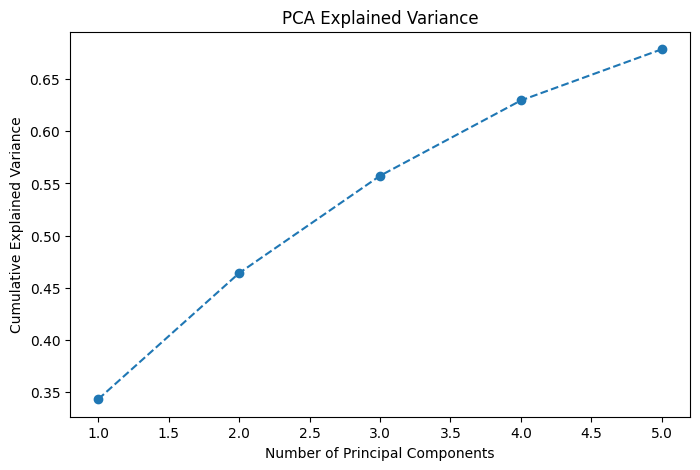

Analysis complete! Check MPI_rankings.csv for results.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# --- STEP 4: DATA PREPROCESSING (NORMALIZATION) ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_avg.iloc[:, 2:])

# --- STEP 5: PCA IMPLEMENTATION ---
pca = PCA(n_components=5)  # Adjust the number of components as needed
pca_components = pca.fit_transform(df_scaled)
pca_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_variance) + 1), pca_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# --- STEP 6: MPI CONSTRUCTION ---
# MPI is a weighted sum of top PCA components (weights = explained variance)
mpi_scores = np.dot(pca_components, pca.explained_variance_ratio_[:5])
df_avg['MPI Score'] = mpi_scores

# Rank countries by MPI Score
df_avg = df_avg.sort_values(by='MPI Score', ascending=True)  # Lower MPI = Higher Poverty

# Save final MPI rankings
df_avg.to_csv('MPI_rankings.csv', index=False)

print('Analysis complete! Check MPI_rankings.csv for results.')

# --- STEP 7: ALLOW DOWNLOAD OF RESULTS ---
files.download("MPI_rankings.csv")
files.download("correlation_matrix.csv")
files.download("dropped_correlated_features.csv")